<a href="https://colab.research.google.com/github/JossefaRodriguez/Examen_I/blob/main/Examen_FundamentosDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analizando la Rotación de Clientes en Telecomunicaciones**

**1.   Preparación del Entorno**




In [ ]:
# Importar librerias.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Conectar con Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2.   Cargar los Datos**


*   *Carga el archivo I/WA_Fn-UseC_-Telco-Customer-Churn.csv en un DataFrame de Pandas.*
*   *Muestra las primeras 10 filas del DataFrame para confirmar que los datos se han cargado correctamente.*


In [ ]:
# Importar el DataFrame.
path = "/content/drive/MyDrive/Colab Notebooks/Bootcamp/Actividades_CORE/Examen I/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

In [ ]:
# Visualizar las primeras 10 filas del DF
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


3.   **Limpieza de datos con Python:**

*   *Identificar y solucionar cualquier valor duplicado.*
*   *Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.*
*   *Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).*
*   *Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.*
*   *Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).*





In [ ]:
# Usamos lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ","_")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [ ]:
# Devolver las filas duplicadas del DF
df[df.duplicated()]
# Devuelve la cantidad de duplicados del DF
df.duplicated().sum()

np.int64(0)

In [ ]:
# Analizamos los tipo de dato correspondiente a las columnas y verificamos que coincidan con el diccionario
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [ ]:
"""
Se detecta que la columna 'partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn'
tiene un dtype object pero según diccionario son boolean, por ser yes or no, sin embargo al querer hacer al cambio
los toma a todos como true lo que no aplicaría a la realidad de los datos por lo cual se mantienen como object
"""
df['partner'].value_counts()


,count
partner,
No,3641
Yes,3402


In [ ]:
df['dependents'].value_counts()


In [ ]:
df['phoneservice'].value_counts()


In [ ]:
df['paperlessbilling'].value_counts()


In [ ]:
df['churn'].value_counts()

In [ ]:
"""
En el caso de la columna 'totalcharges' que si bien en el df es de tipo object
en el diccionario la muestra como tipo integer, sin embargo al consultar los datos
es de tipo numerico pero float por lo que se procede a realizar el cambio
"""
df["totalcharges"] = df["totalcharges"].astype(float)

ValueError: could not convert string to float: ' '

In [ ]:
"""
En el caso anterior nos arroja un error porque no se puede convertir
un string a float en este caso un vacio a float, por lo cual verificamos
cuales serian los datos vacios y existen según la consulta 11 datos de la tabla
como vacios
ValueError: could not convert string to float: ' '
"""

df['totalcharges'].value_counts()

,count
totalcharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [ ]:
# Se verifican los registros sin información están con un espacio, por lo cual se filtran para ver el motivo
filtro_vacios = (df['totalcharges'] == " ")
df[filtro_vacios]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
"""
Al consultar los datos se detecta que existe un valor 0 en 'tenure' columna que corresponde a los
numero de meses que el cliente ha estado en la empresa por lo cual aplicaría que la columna 'totalcharges'
este con un espacio por lo cual sería adecuado remplazar estos espacios por 0 para finalmente aplicar el cambio
de tipo de dato a float a la columna completa. Para aplicar esto primero debemos convertir a null estos datos vacios ya que
son cadenas vacias y despues convertirlos en 0
"""
# Reemplazar vacíos por NaN
df['totalcharges'] = df['totalcharges'].replace([" "], np.nan)


In [ ]:
# Se comprueba que existan los 11 registros de la columna totalcharges como null
df.isnull().sum()



,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [ ]:
# Se remplazan los Nan por 0
df['totalcharges'] = df['totalcharges'].fillna(0)

In [ ]:
# Se comprueba nuevamente que los 11 datos de la columna totalcharges esten en 0
df['totalcharges'].value_counts()

,count
totalcharges,
0.00,11
20.20,11
19.75,9
20.05,8
19.90,8
...,...
130.15,1
3211.90,1
7843.55,1


In [ ]:
# Se procede al cambio de tipo de dato de la coliumna totalcharges por float
df["totalcharges"] = df["totalcharges"].astype(float)

In [ ]:
# Comprobamos el cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [ ]:
# Al consultar datos nulos,no se encuentran
df.isna().sum()

,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [ ]:
"""
Lo siguiente será solucionar cualquier dato inapropiado y según lo analizado en el dataset
es que hay una columna de cargo mensual y una columna del total de cargos los que podriamos
determinar que deben ser igual o mayores a cero contextualizando, para lo cual filtraremos los
datos que esten fuera de este rango como por ejemplo los valores negativos y en caso de existir
se analizará el por qué y se determinará una acción
"""
# Se filtra la columna monthlycharges con valores menores a 0
df[df['monthlycharges'] < 0]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [ ]:
# Se filtra la columna totalcharges con valores menores a 0
df[df['totalcharges'] < 0]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [ ]:
"""
No se encuentran valores al menos en estas dos columnas fuera de lo usual
o inapropiado por lo cual no se tomará ninguna acción
"""

**4.   Exploración de datos con Python**

*   *Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.*
*   *Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.*




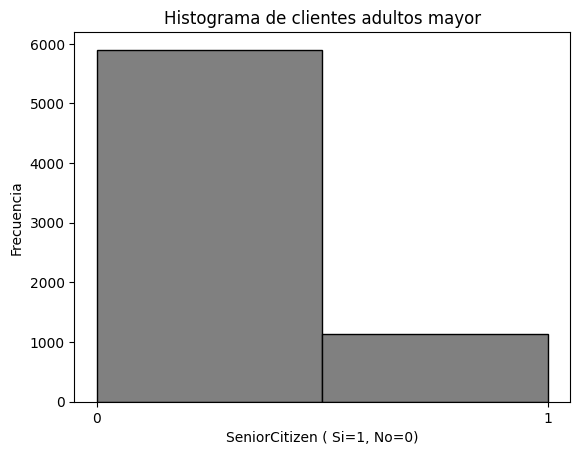

In [ ]:
"""
Para generar la primera visualización exploratoria univariadas se utilizará
el histograma para los datos de la columna 'seniorcitizen' la
cual establece si los usuarios o clientes son o no adultos mayores
"""

# Se crea el histograma.
plt.hist(df['seniorcitizen'], bins=2, color='grey', edgecolor='black')
plt.title('Histograma de clientes adultos mayor')
plt.xlabel('SeniorCitizen ( Si=1, No=0)')
plt.ylabel('Frecuencia')
plt.xticks([0, 1])
plt.show()

**Analisis Histograma Frecuencia de Usuario/Cliente Adulto Mayor**


*   *Tras el analisis de la información visualizada en el histograma se determina que la mayor parte de los clientes no pson adultos mayores si no que más bien existe una menor cantidad de personas pertencientes a este grupo etario en el segmento de clientes/usuarios.*




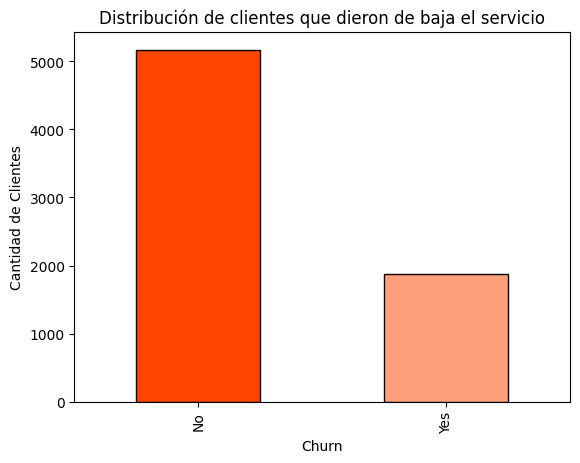

In [ ]:
"""
Para generar la segunda visualización exploratorias univariadas se utilizará
el grafico de barras de los datos de la columna 'churn' la
cual muestra si los usuarios se dieron de baja
"""

# Se crea el grafico de barras.
df['churn'].value_counts().plot(kind='bar', color=['orangered','lightsalmon'], edgecolor = 'black')
plt.title('Distribución de clientes que dieron de baja el servicio')
plt.xlabel('Churn')
plt.ylabel('Cantidad de Clientes')
plt.show()

**Analisis de grafico de barras de clientes que dieron de baja el servicio**


*   *Tras el analisis de la información visualizada en el diagrama de barras se determina que la mayor parte de los clientes ncontinuan con los servicios activos, aproximadamente 1800 de los mas de 7000 clientes dieron de baja los servicios*

<ipython-input-114-3646053237>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='seniorcitizen', y='totalcharges', data=df, palette=["orange", "salmon"])


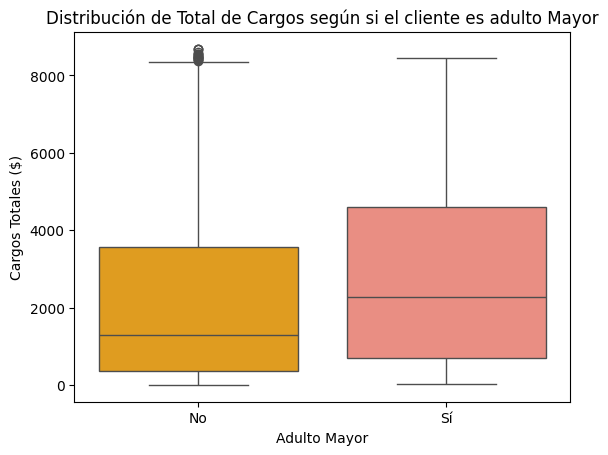

In [ ]:
"""
Para generar la primera visualización exploratoria multivariada se utilizará
el grafico de caja para los datos de la columna 'totalcharges'
y los datos de la columna 'seniorcitizen' la cual establece los gastos totales
por servicio de los clientes segmentados en adultos mayores o no
"""
# Se crea el grafico de caja
sns.boxplot(x='seniorcitizen', y='totalcharges', data=df, palette=["orange", "salmon"])
plt.title('Distribución de Total de Cargos según si el cliente es adulto Mayor')
plt.xlabel('Adulto Mayor')
plt.ylabel('Cargos Totales ($)')
plt.xticks([0,1], ['No', 'Sí'])
plt.show()

**Analisis de grafico de caja sobre el Total de Cargos según si el cliente es adulto Mayor**


*   *Tras el analisis de la información visualizada en el diagrama de caja se puede determinar que los clientes/usuarios Adultos Mayores tienen un rango de gastoas mayor que el resto de los usuarios*

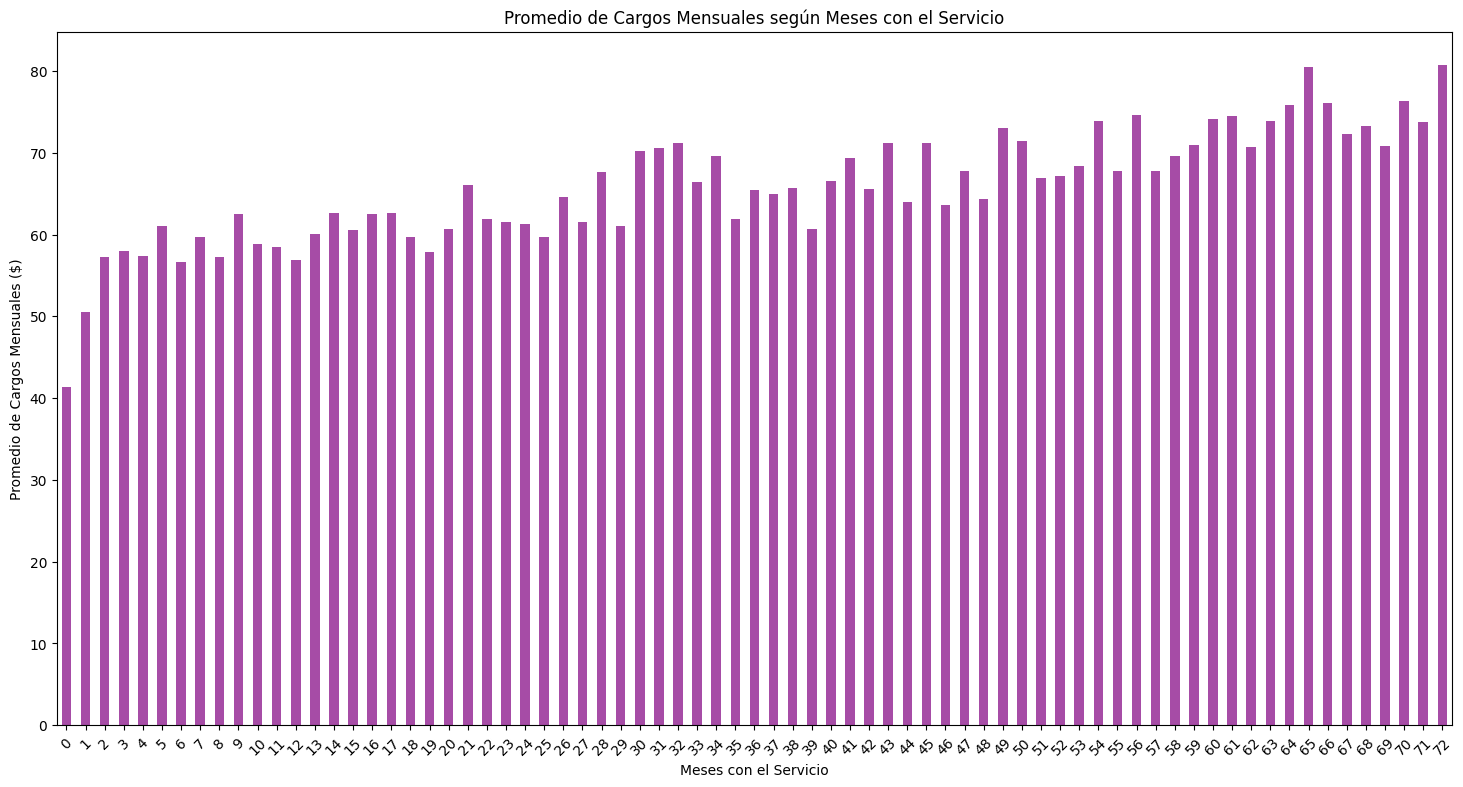

In [ ]:
"""
Para generar la segunda visualización exploratoria multivariada se utilizará
el grafico de barras para los datos de la columna 'monthlycharges'
y los datos de la columna 'tenure' la cual establece la relación que existe entre los cargos
mensuales y los meses que lleva el cliente con el servicio
"""

# Se calcula el primedio de la columna monthlycharges para cada mes de la columna tenure
prom = df.groupby('tenure')['monthlycharges'].mean()

# Graficar barras
plt.figure(figsize=(18,9))
prom.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Promedio de Cargos Mensuales según Meses con el Servicio')
plt.xlabel('Meses con el Servicio')
plt.ylabel('Promedio de Cargos Mensuales ($)')
plt.xticks(rotation=45)
plt.show()

**Analisis de grafico de barras sobre la relación entre los cargos mensuales y el tiempo que llevan los clientes con el servicio**


*   *Tras el analisis de la información visualizada en el diagrama de barras que conforme aumenta el tiempo en servicio tambien aumenta el promedio de gasto mensual. Por otra parte podemos visualizar que los primeros meses mantienen un gasto mensual más bajo por lo que podriamos inferir que quizas existan ofertas por primeras suscripciones.*